In [1]:
from sys import maxsize #para imprimir arrays completos
import numpy as np
import pandas as pd
import re as regex
import math as math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pathArchivoDataSet = 'mushrooms.csv' 
mushrooms = pd.read_csv(pathArchivoDataSet)

In [3]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
mushrooms.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1484,e,f,y,y,t,l,f,c,b,n,...,y,w,w,p,w,o,p,k,y,g
5094,p,x,f,y,f,f,f,c,b,p,...,k,n,n,p,w,o,l,h,y,d
7009,e,x,f,w,f,n,f,w,b,g,...,k,w,w,p,w,t,p,w,s,g
6558,e,x,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,v,l
1780,e,x,f,g,f,n,f,c,n,n,...,s,w,w,p,w,o,p,n,v,u
1256,p,f,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,s,g
5116,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,p
6347,p,f,s,n,f,s,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
7110,e,b,f,w,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,n,g
6173,p,f,s,e,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


In [6]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
def getDescriptForEachColumns(df):
    
    for column in df:
                
        ##Attribute Information: (classes: edible=e, poisonous=p)
        ##Decalramos a la clase como Dummies.
        if column == 'class':
            df[column] = df[column].replace('e', 1)
            df[column] = df[column].replace('p', 0)
            df.rename(columns={'class': 'edible'}, inplace=True)
        #cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
        elif column == 'cap-shape':
            df[column] = df[column].replace('b', 'bell')
            df[column] = df[column].replace('c', 'conical')
            df[column] = df[column].replace('x', 'convex')
            df[column] = df[column].replace('f', 'flat')
            df[column] = df[column].replace('k', 'knobbed')
            df[column] = df[column].replace('s', 'sunken')
            
        #cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
        elif column == 'cap-surface':
            df[column] = df[column].replace('f', 'fibrous')
            df[column] = df[column].replace('g', 'grooves')
            df[column] = df[column].replace('y', 'scaly')
            df[column] = df[column].replace('s', 'smooth')
        
        #cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
        elif column == 'cap-color':
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('c', 'cinnamon')
            df[column] = df[column].replace('g', 'gray')
            df[column] = df[column].replace('r', 'green')
            df[column] = df[column].replace('p', 'pink')
            df[column] = df[column].replace('u', 'purple')
            df[column] = df[column].replace('e', 'red')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')
        
        #bruises: bruises=t,no=f
        #declaramos a Bruises como dummies 
        elif column == 'bruises':
            df[column] = df[column].replace('t', 1)
            df[column] = df[column].replace('f', 0)
            
        #odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
        elif column == 'odor':
            df[column] = df[column].replace('a', 'almond')
            df[column] = df[column].replace('l', 'anise')
            df[column] = df[column].replace('c', 'creosote')
            df[column] = df[column].replace('y', 'fishy')
            df[column] = df[column].replace('f', 'foul')
            df[column] = df[column].replace('m', 'musty')
            df[column] = df[column].replace('n', 'none')
            df[column] = df[column].replace('p', 'pungent')
            df[column] = df[column].replace('s', 'spicy')
                    
        #gill-attachment: attached=a,descending=d,free=f,notched=n
        elif column == 'gill-attachment':
            df[column] = df[column].replace('a', 'attached')
            df[column] = df[column].replace('d', 'descending')
            df[column] = df[column].replace('f', 'free')
            df[column] = df[column].replace('n', 'notched')
        
        #gill-spacing: close=c,crowded=w,distant=d
        elif column == 'gill-spacing':
            df[column] = df[column].replace('c', 'close')
            df[column] = df[column].replace('w', 'crowded')
            df[column] = df[column].replace('d', 'distant')
        
        #gill-size: broad=b,narrow=n
        elif column == 'gill-size':
            df[column] = df[column].replace('b', 'broad')
            df[column] = df[column].replace('n', 'narrow')
        
        #gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
        elif column == 'gill-color':
            df[column] = df[column].replace('k', 'black')
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('h', 'chocolate')
            df[column] = df[column].replace('g', 'gray')
            df[column] = df[column].replace('r', 'green')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('p', 'pink')
            df[column] = df[column].replace('u', 'purple')
            df[column] = df[column].replace('e', 'red')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')
        
        #stalk-shape: enlarging=e,tapering=t
        elif column == 'stalk-shape':
            df[column] = df[column].replace('e', 'enlarging')
            df[column] = df[column].replace('t', 'tapering')
        
        #stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
        elif column == 'stalk-root':
            df[column] = df[column].replace('b', 'bulbous')
            df[column] = df[column].replace('c', 'club')
            df[column] = df[column].replace('u', 'cup')
            df[column] = df[column].replace('e', 'equal')
            df[column] = df[column].replace('z', 'rhizomorphs')
            df[column] = df[column].replace('r', 'rooted')
            df[column] = df[column].replace('?', 'missing')
            
        #stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
        elif column == 'stalk-surface-above-ring':
            df[column] = df[column].replace('f', 'fibrous')
            df[column] = df[column].replace('y', 'scaly')
            df[column] = df[column].replace('k', 'silky')
            df[column] = df[column].replace('s', 'smooth')
        
        #stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
        elif column == 'stalk-surface-below-ring':
            df[column] = df[column].replace('f', 'fibrous')
            df[column] = df[column].replace('y', 'scaly')
            df[column] = df[column].replace('k', 'silky')
            df[column] = df[column].replace('s', 'smooth')
        
        #stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
        elif column == 'stalk-color-above-ring':
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('c', 'cinnamon')
            df[column] = df[column].replace('g', 'gray')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('p', 'pink')
            df[column] = df[column].replace('e', 'red')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')
        
        #stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
        elif column == 'stalk-color-below-ring':
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('c', 'cinnamon')
            df[column] = df[column].replace('g', 'gray')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('p', 'pink')
            df[column] = df[column].replace('e', 'red')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')

        
        #veil-type: partial=p,universal=u
        elif column == 'veil-type':
            df[column] = df[column].replace('p', 'partial')
            df[column] = df[column].replace('u', 'universal')

        #veil-color: brown=n,orange=o,white=w,yellow=y
        elif column == 'veil-color':
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')

        #ring-number: none=n,one=o,two=t
        elif column == 'ring-number':
            df[column] = df[column].replace('n', 'none')
            df[column] = df[column].replace('o', 'one')
            df[column] = df[column].replace('t', 'two')

        #ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
        elif column == 'ring-type':
            df[column] = df[column].replace('c', 'cobwebby')
            df[column] = df[column].replace('e', 'evanescent')
            df[column] = df[column].replace('f', 'flaring')
            df[column] = df[column].replace('l', 'large')
            df[column] = df[column].replace('n', 'none')
            df[column] = df[column].replace('p', 'pendant')
            df[column] = df[column].replace('s', 'sheathing')
            df[column] = df[column].replace('z', 'zone')
            
        #spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
        elif column == 'spore-print-color':
            df[column] = df[column].replace('k', 'black')
            df[column] = df[column].replace('n', 'brown')
            df[column] = df[column].replace('b', 'buff')
            df[column] = df[column].replace('h', 'chocolate')
            df[column] = df[column].replace('g', 'green')
            df[column] = df[column].replace('o', 'orange')
            df[column] = df[column].replace('u', 'purple')
            df[column] = df[column].replace('w', 'white')
            df[column] = df[column].replace('y', 'yellow')
        
        #population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
        elif column == 'population':
            df[column] = df[column].replace('a', 'abundant')
            df[column] = df[column].replace('c', 'clustered')
            df[column] = df[column].replace('n', 'numerous')
            df[column] = df[column].replace('s', 'scattered')
            df[column] = df[column].replace('v', 'several')
            df[column] = df[column].replace('y', 'solitary')

        #habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
        elif column == 'habitat':
            df[column] = df[column].replace('g', 'grasses')
            df[column] = df[column].replace('l', 'leaves')
            df[column] = df[column].replace('m', 'meadows')
            df[column] = df[column].replace('p', 'paths')
            df[column] = df[column].replace('u', 'urban')
            df[column] = df[column].replace('w', 'waste')
            df[column] = df[column].replace('d', 'woods')
            

In [8]:
getDescriptForEachColumns(mushrooms)

In [9]:
mushrooms.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,1,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,1,convex,smooth,yellow,1,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,1,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,0,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,1,convex,smooth,gray,0,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [10]:
def getInfoByColumn(df):
    
    for column in df:
        
        InfoBasica = df[column].describe()
        
        uniqueValuesCount = len(df[column].unique())
        
        if (uniqueValuesCount < 10):
            
            ShowUnique = 'Show Unique  ' + str(df[column].unique()).strip('[]')
        else:
            ShowUnique = 'Show Unique  ' + str(df[column].unique()[0:30]).strip('[]') + ',etc...'
        
        print('Información columna: {} \n''---------------\n{}'.format(column, InfoBasica))
        print('{}''\n'.format(ShowUnique))

In [11]:
getInfoByColumn(mushrooms)

Información columna: edible 
---------------
count    8124.000000
mean        0.517971
std         0.499708
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: edible, dtype: float64
Show Unique  0 1

Información columna: cap-shape 
---------------
count       8124
unique         6
top       convex
freq        3656
Name: cap-shape, dtype: object
Show Unique  'convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical'

Información columna: cap-surface 
---------------
count      8124
unique        4
top       scaly
freq       3244
Name: cap-surface, dtype: object
Show Unique  'smooth' 'scaly' 'fibrous' 'grooves'

Información columna: cap-color 
---------------
count      8124
unique       10
top       brown
freq       2284
Name: cap-color, dtype: object
Show Unique  'brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green',etc...

Información columna: bruises 
---------------
count    8124.000000
mean        0.415

In [12]:
#Funión para graficar un histograma por cada columna del dataset
def getHistogramByColumn(df):
    for column in df:

        #Gráfica Histograma:
        Histograma = df[column].hist(grid=False, color='indigo', bins=10, xlabelsize=10, xrot=45)
        
        #Título y nombre de ejes: 
        plt.xlabel(column, fontsize= 13, color='green')
        plt.ylabel('Freq.',fontsize= 13, color='green')
        plt.title('Columna: ' + column, fontsize= 20, color='mediumslateblue')
        
        plt.legend(labels=df[column],  loc='upper right', fontsize='small',bbox_to_anchor=(1.3, 1))
        plt.show()
        print (Histograma)

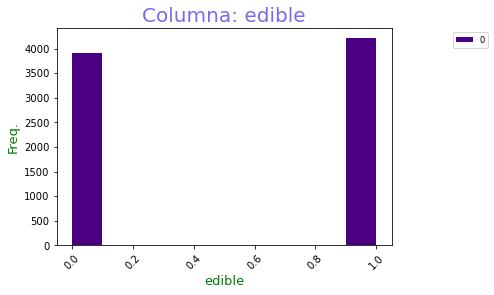

AxesSubplot(0.125,0.125;0.775x0.755)


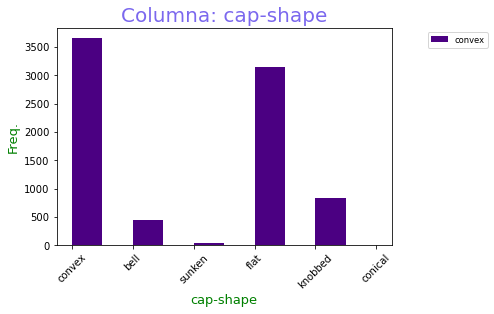

AxesSubplot(0.125,0.125;0.775x0.755)


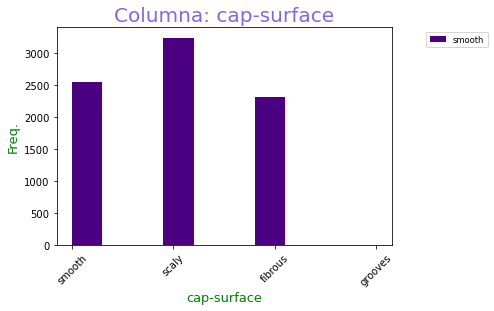

AxesSubplot(0.125,0.125;0.775x0.755)


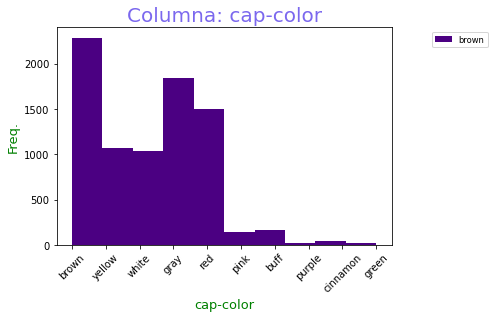

AxesSubplot(0.125,0.125;0.775x0.755)


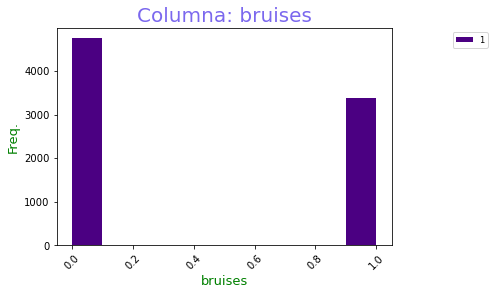

AxesSubplot(0.125,0.125;0.775x0.755)


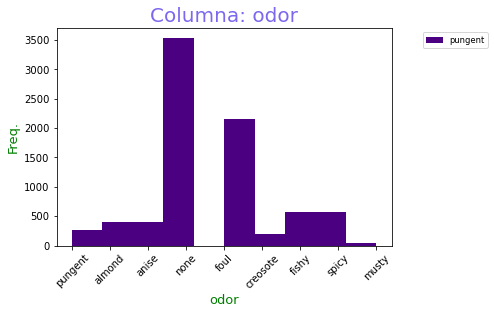

AxesSubplot(0.125,0.125;0.775x0.755)


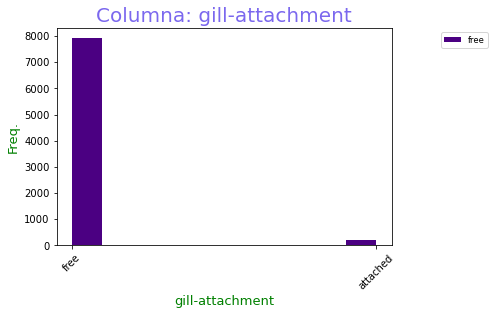

AxesSubplot(0.125,0.125;0.775x0.755)


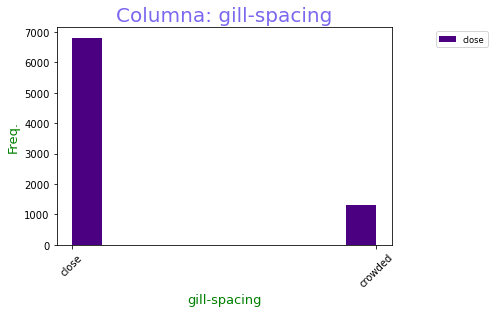

AxesSubplot(0.125,0.125;0.775x0.755)


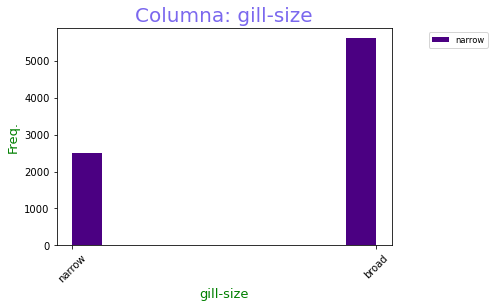

AxesSubplot(0.125,0.125;0.775x0.755)


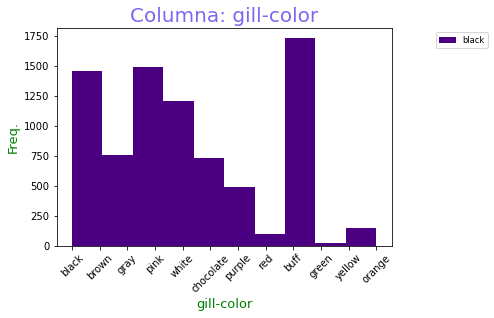

AxesSubplot(0.125,0.125;0.775x0.755)


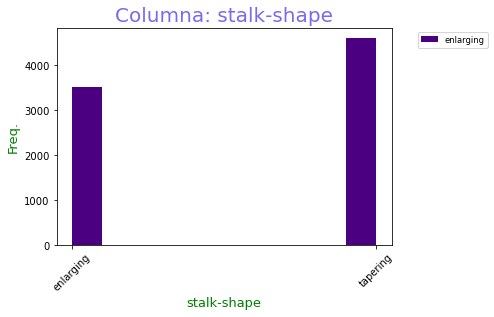

AxesSubplot(0.125,0.125;0.775x0.755)


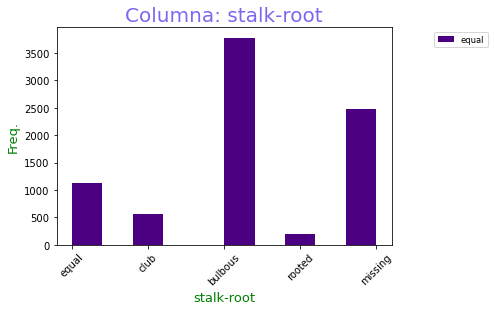

AxesSubplot(0.125,0.125;0.775x0.755)


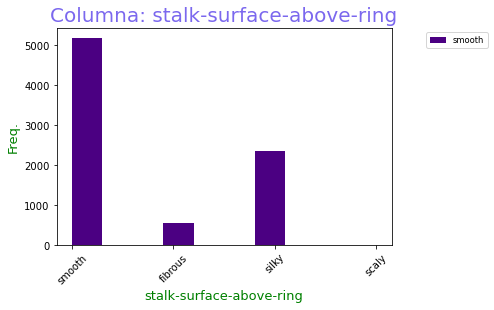

AxesSubplot(0.125,0.125;0.775x0.755)


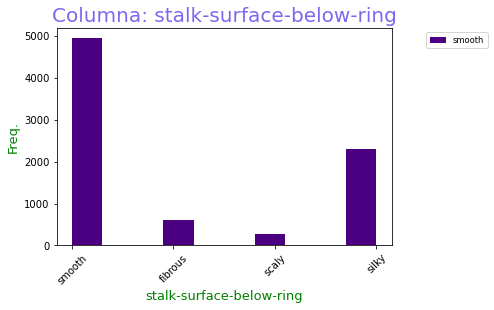

AxesSubplot(0.125,0.125;0.775x0.755)


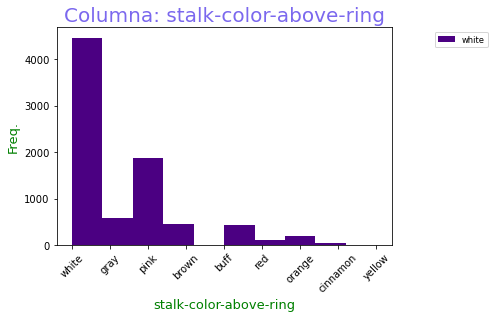

AxesSubplot(0.125,0.125;0.775x0.755)


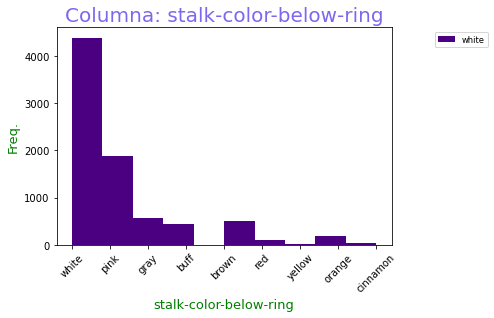

AxesSubplot(0.125,0.125;0.775x0.755)


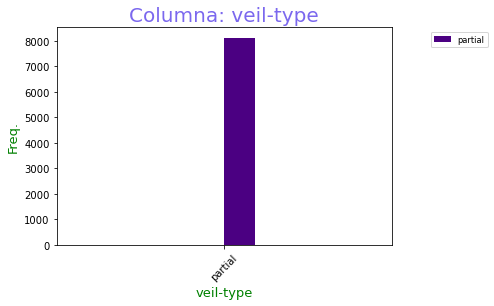

AxesSubplot(0.125,0.125;0.775x0.755)


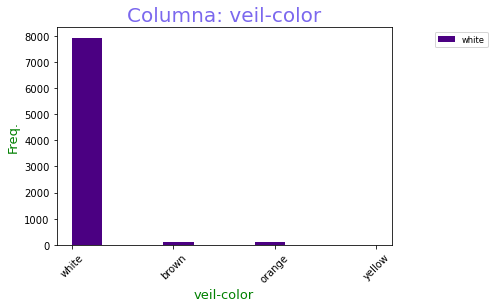

AxesSubplot(0.125,0.125;0.775x0.755)


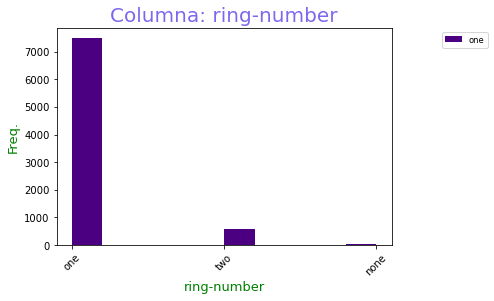

AxesSubplot(0.125,0.125;0.775x0.755)


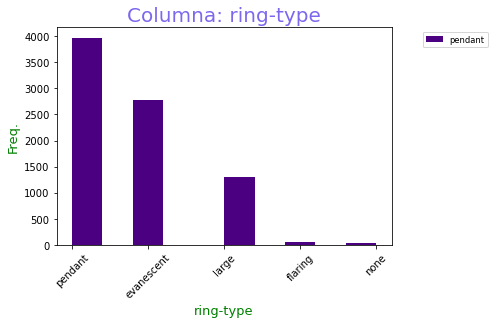

AxesSubplot(0.125,0.125;0.775x0.755)


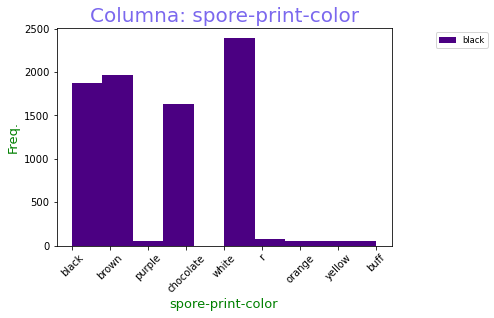

AxesSubplot(0.125,0.125;0.775x0.755)


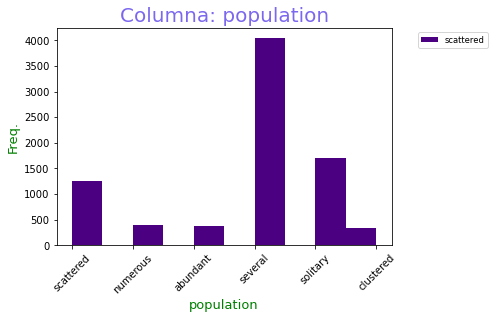

AxesSubplot(0.125,0.125;0.775x0.755)


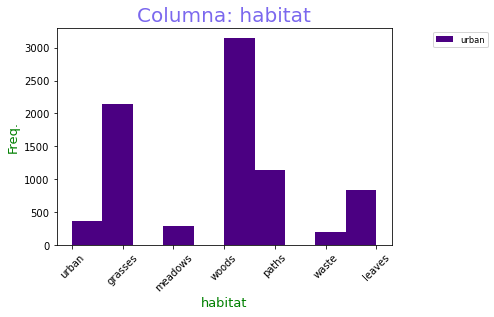

AxesSubplot(0.125,0.125;0.775x0.755)


In [13]:

getHistogramByColumn(mushrooms)

In [14]:
# Selección de columnas para Dummies

mushroomsdummies = pd.get_dummies(mushrooms, drop_first=True, columns=mushrooms.columns)
mushroomsdummies

,edible_1,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8120,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
8121,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [15]:
#Columnas luego de hacer Dummies
mushroomsdummies.columns

Index(['edible_1', 'cap-shape_conical', 'cap-shape_convex', 'cap-shape_flat',
       'cap-shape_knobbed', 'cap-shape_sunken', 'cap-surface_grooves',
       'cap-surface_scaly', 'cap-surface_smooth', 'cap-color_buff',
       'cap-color_cinnamon', 'cap-color_gray', 'cap-color_green',
       'cap-color_pink', 'cap-color_purple', 'cap-color_red',
       'cap-color_white', 'cap-color_yellow', 'bruises_1', 'odor_anise',
       'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none',
       'odor_pungent', 'odor_spicy', 'gill-attachment_free',
       'gill-spacing_crowded', 'gill-size_narrow', 'gill-color_brown',
       'gill-color_buff', 'gill-color_chocolate', 'gill-color_gray',
       'gill-color_green', 'gill-color_orange', 'gill-color_pink',
       'gill-color_purple', 'gill-color_red', 'gill-color_white',
       'gill-color_yellow', 'stalk-shape_tapering', 'stalk-root_club',
       'stalk-root_equal', 'stalk-root_missing', 'stalk-root_rooted',
       'stalk-surface-above-r

In [16]:
def getStatisticForEachColumn(df):
    
    for column in df:
        
        STD = df[column].std()
        
        MEAN = df[column].mean()
        
        VAR =  df[column].var()
        
        print('Statistics mesures from:{}\n-----------------------------\nSTD:{}\nVAR: {}\nMean: {}\n'.format(column, STD, VAR, MEAN))

In [17]:
getStatisticForEachColumn(mushroomsdummies)

Statistics mesures from:edible_1
-----------------------------
STD:0.49970767884413053
VAR: 0.2497077642957887
Mean: 0.517971442639094

Statistics mesures from:cap-shape_conical
-----------------------------
STD:0.022185275504213193
VAR: 0.0004921864491978419
Mean: 0.0004923682914820286

Statistics mesures from:cap-shape_convex
-----------------------------
STD:0.49752681392757064
VAR: 0.2475329305769195
Mean: 0.4500246184145741

Statistics mesures from:cap-shape_flat
-----------------------------
STD:0.4873213968679901
VAR: 0.23748214384536911
Mean: 0.3879862136878385

Statistics mesures from:cap-shape_knobbed
-----------------------------
STD:0.30256201029582624
VAR: 0.09154377007425166
Mean: 0.1019202363367799

Statistics mesures from:cap-shape_sunken
-----------------------------
STD:0.06264115289778346
VAR: 0.003923914036363486
Mean: 0.003938946331856229

Statistics mesures from:cap-surface_grooves
-----------------------------
STD:0.02218527550421319
VAR: 0.0004921864491978418
Me

In [18]:
# Cov(x,y) = (Sum(xi - x_mean) * Sum(yi - y_mean))/n

In [19]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size),)
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [20]:
mushroomsdummies.corr()

,edible_1,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
edible_1,1.000000,-0.023007,0.026886,-0.018526,-0.163565,0.060664,-0.023007,-0.088677,-0.095454,-0.067544,...,0.219529,0.159572,-0.443722,0.107055,-0.155150,0.138627,-0.323346,-0.112078,0.150087,0.126123
cap-shape_conical,-0.023007,1.000000,-0.020077,-0.017672,-0.007477,-0.001396,0.249631,0.015893,-0.015038,-0.003225,...,-0.005051,-0.009456,-0.022075,-0.011469,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,-0.017653
cap-shape_convex,0.026886,-0.020077,1.000000,-0.720235,-0.304733,-0.056884,-0.020077,-0.019137,-0.040634,-0.020175,...,-0.004586,0.059264,-0.060421,0.044626,-0.096639,-0.004529,-0.029042,0.002845,-0.036493,0.071773
cap-shape_flat,-0.018526,-0.017672,-0.720235,1.000000,-0.268226,-0.050070,-0.006285,0.029076,-0.093397,0.019203,...,-0.181191,-0.075804,0.034625,0.111346,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.074986
cap-shape_knobbed,-0.163565,-0.007477,-0.304733,-0.268226,1.000000,-0.021185,0.010863,0.015261,0.137988,-0.003209,...,0.013599,-0.089360,0.172707,-0.170081,0.235108,-0.065047,0.090538,-0.073380,0.119003,-0.089230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_meadows,0.138627,-0.004286,-0.004529,-0.129312,-0.065047,-0.012142,-0.004286,0.039697,0.077081,0.027701,...,0.347262,0.152473,-0.144434,-0.099772,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.153579
habitat_paths,-0.323346,-0.008985,-0.029042,0.021891,0.090538,-0.025458,-0.008985,0.117915,-0.039574,-0.058829,...,-0.092129,-0.125366,0.169228,0.040714,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,-0.322005
habitat_urban,-0.112078,-0.004835,0.002845,0.030636,-0.073380,0.288697,-0.004835,-0.100248,0.117548,0.167996,...,-0.049569,0.130450,0.001180,-0.042888,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,-0.173254
habitat_waste,0.150087,-0.003453,-0.036493,-0.017450,0.119003,-0.009784,-0.003453,0.031986,0.062109,0.250709,...,-0.035405,-0.066282,-0.154742,-0.080392,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.123748


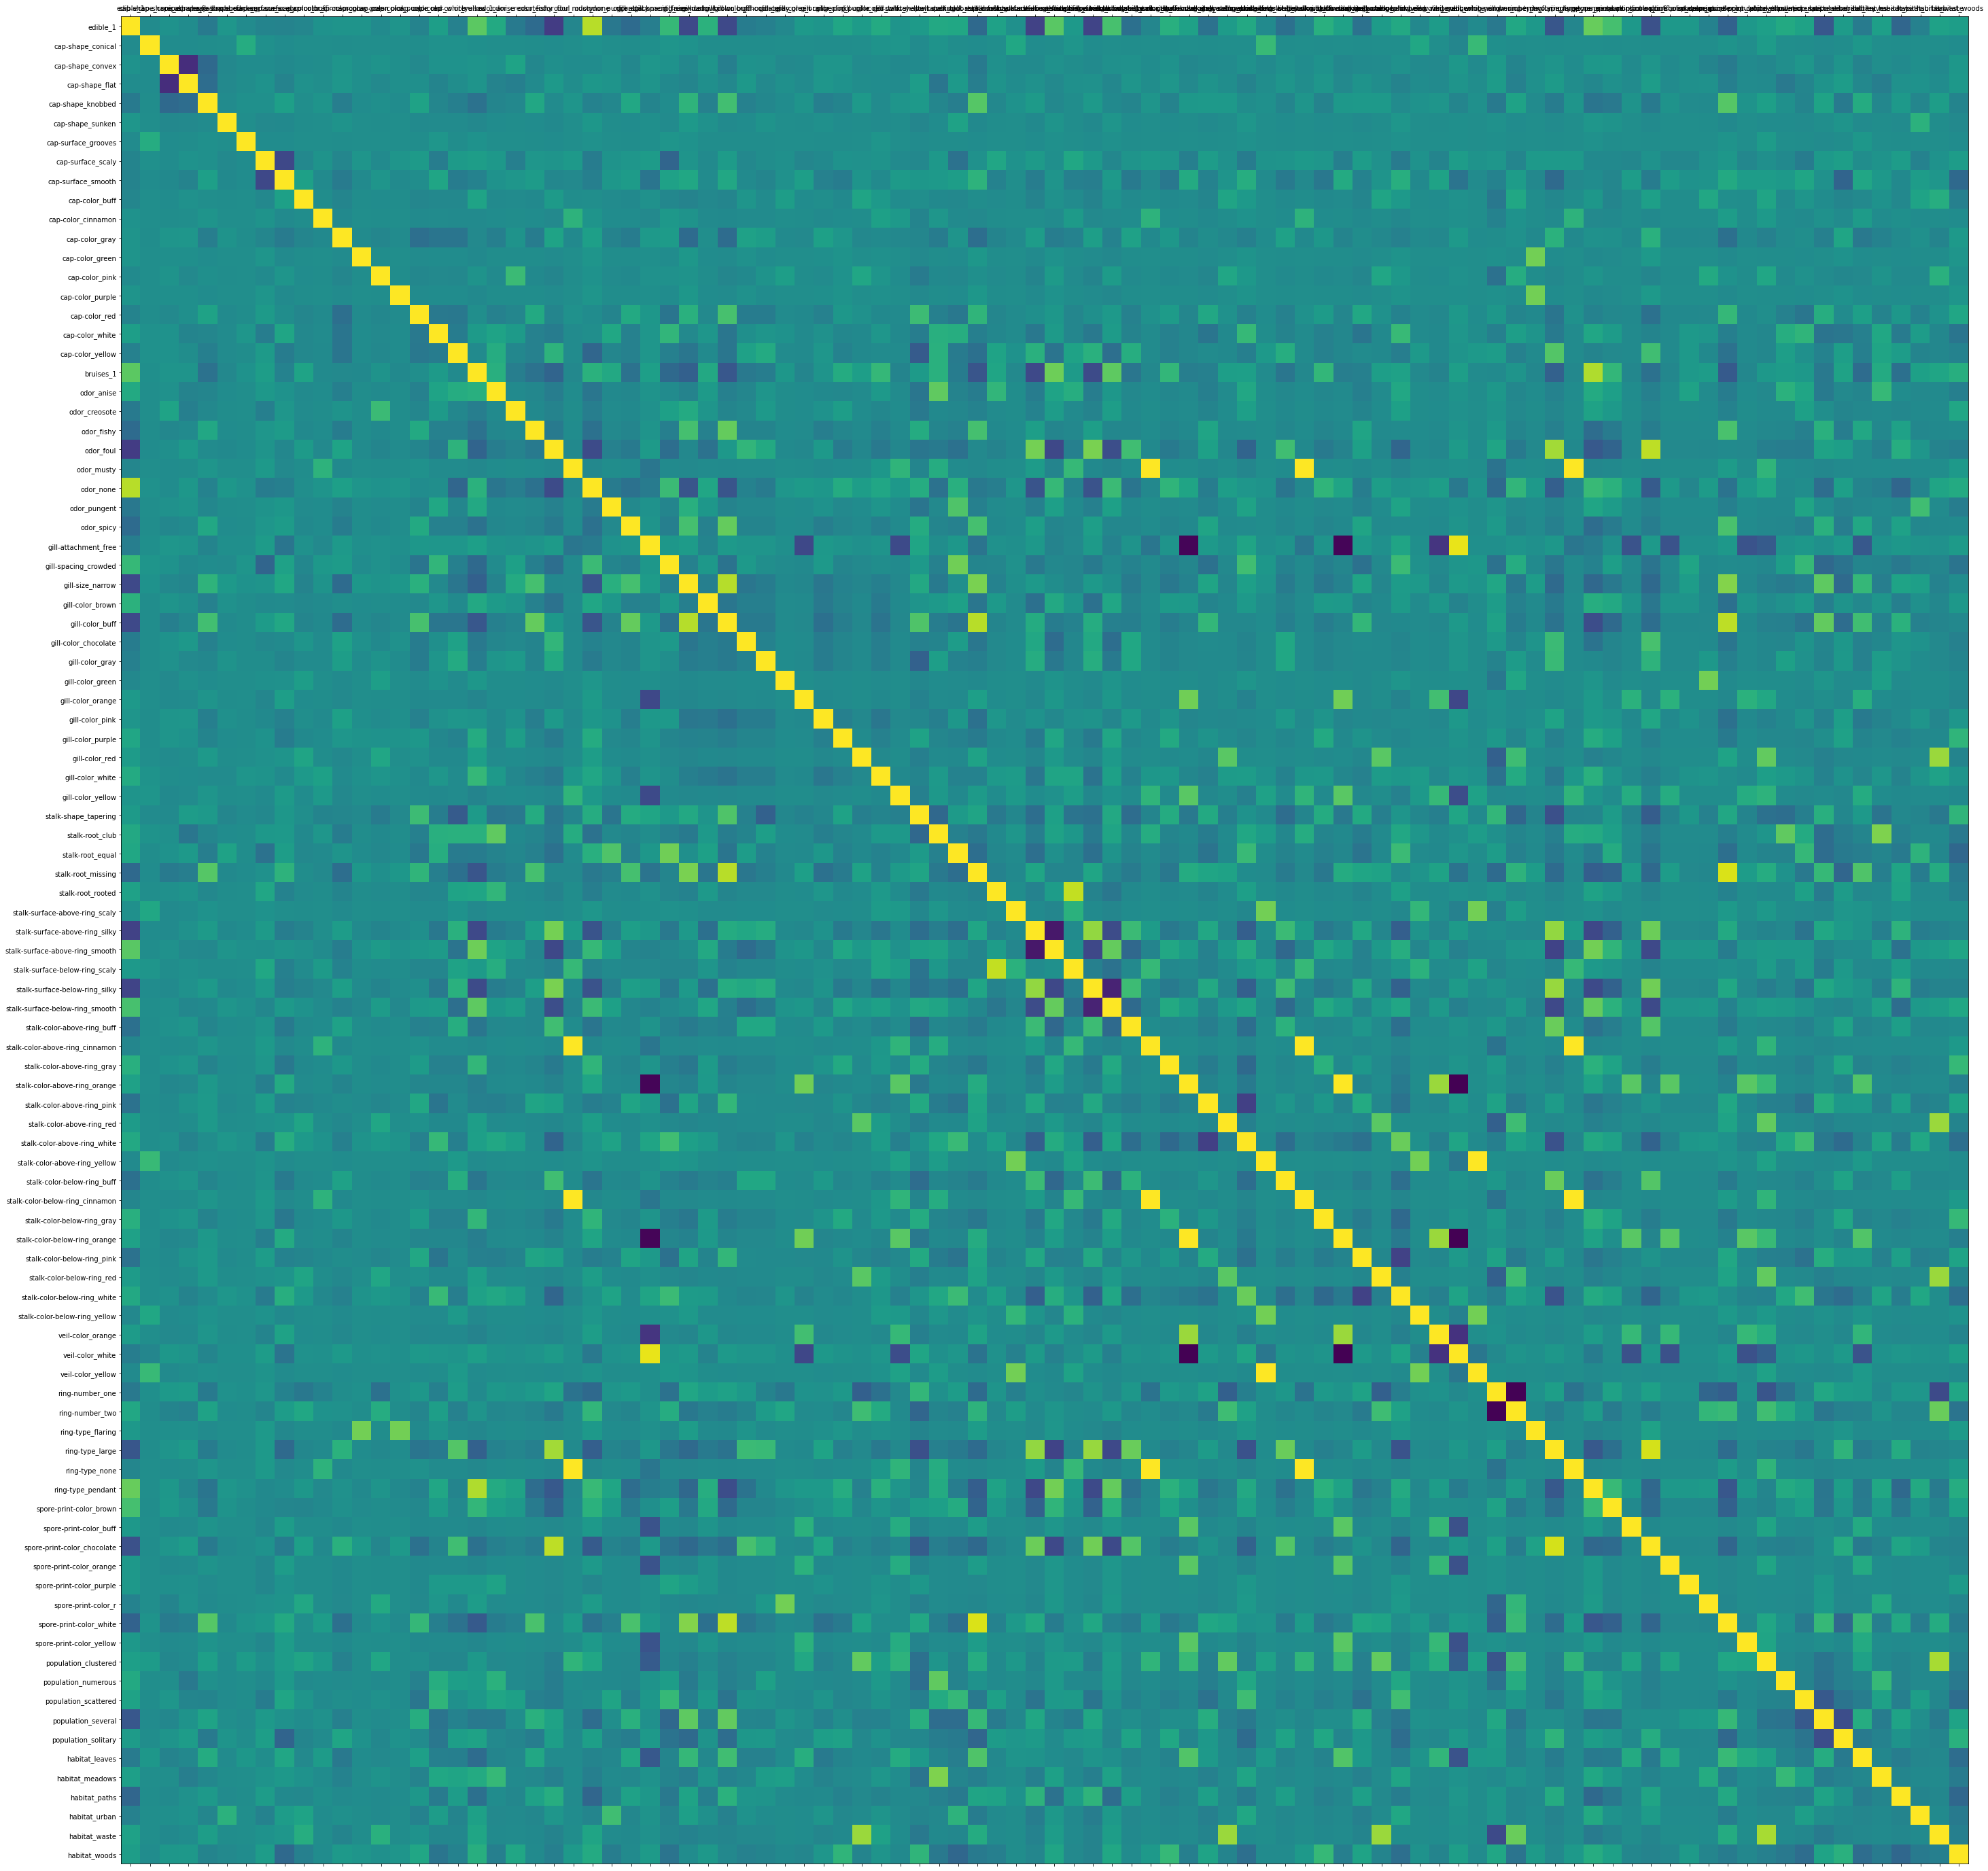

In [21]:
plot_corr(mushroomsdummies, size=50)

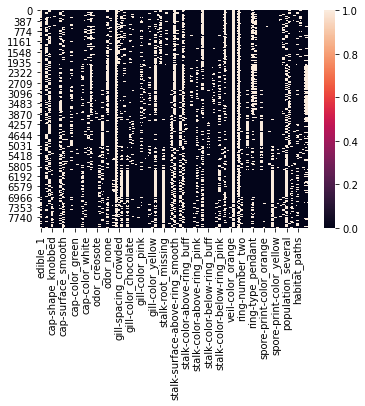

In [22]:
hm = sns.heatmap(mushroomsdummies,)

In [23]:
X = mushroomsdummies.drop(['edible_1'],axis=1)
X.head()

,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,cap-color_cinnamon,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y = mushroomsdummies['edible_1']
y.sample(10)

7178    0
4431    0
1870    1
5631    0
5957    0
3088    1
5707    0
1066    1
6745    0
2205    1
Name: edible_1, dtype: uint8

In [25]:
pd.Series(y).value_counts(normalize=True)

1    0.517971
0    0.482029
Name: edible_1, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [27]:
y_test

700     0
907     1
5546    1
3644    0
4279    0
       ..
4764    0
4336    0
3352    0
1504    1
3679    0
Name: edible_1, Length: 2031, dtype: uint8

In [28]:
# Vamos a querer graficar los distintos valores del score de cross validation
# en función del hiperparámetro n_neighbors. Para esto generamos una lista de
# diccionarios que después se puede convertir fácilmente en DataFrame.

# Probamos todos los enteros desde el 1 hasta el 20
# como posibles valores de n_neighbors a explorar.

kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 21):
    
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores), 'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [29]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores

,score_medio,score_std,n_neighbours
0,1.000000,0.000000,1
1,1.000000,0.000000,2
2,1.000000,0.000000,3
3,0.999836,0.000328,4
4,1.000000,0.000000,5
5,1.000000,0.000000,6
6,0.999672,0.000656,7
7,0.999836,0.000328,8
8,0.999508,0.000984,9
9,0.999508,0.000984,10


In [30]:
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,1.000000,0.000000,1,1.000000,1.000000
1,1.000000,0.000000,2,1.000000,1.000000
2,1.000000,0.000000,3,1.000000,1.000000
3,0.999836,0.000328,4,0.999507,1.000164
4,1.000000,0.000000,5,1.000000,1.000000
5,1.000000,0.000000,6,1.000000,1.000000
6,0.999672,0.000656,7,0.999016,1.000328
7,0.999836,0.000328,8,0.999508,1.000164
8,0.999508,0.000984,9,0.998523,1.000492
9,0.999508,0.000984,10,0.998523,1.000492


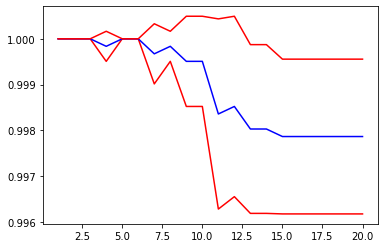

In [31]:
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

In [32]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,1.0,0.0,1,1.0,1.0
1,1.0,0.0,2,1.0,1.0
2,1.0,0.0,3,1.0,1.0
4,1.0,0.0,5,1.0,1.0
5,1.0,0.0,6,1.0,1.0


In [33]:
best_k = df_scores.loc[df_scores.score_medio ==\
                               df_scores.score_medio.max(),'n_neighbours'].values
best_k = best_k[1]
best_k

2

Comenzamos a Estandarizar la obtención del K

In [34]:
# Utilizamos sklearn para estandarizar la matriz de features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [35]:
# Verificamos que las columnas tengan media 0 y desvío 1.
print('media:',np.mean(X_train[:,1]))
print('desvio:',np.std(X_train[:,1]))

media: 9.32929900883112e-18
desvio: 1.0


In [36]:
# Calculamos nuevamente los scores de cross validation,
# pero esta vez sobre los features estandarizados:

scores_para_df_standar = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [37]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head()

,score_medio,score_std,n_neighbours
0,1.000000,0.000000,1
1,1.000000,0.000000,2
2,1.000000,0.000000,3
3,1.000000,0.000000,4
4,0.999508,0.000402,5


In [38]:
# Armamos nuevamente los límites para graficar

df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']
df_scores_standar.head()

,score_medio,score_std,n_neighbours,limite_superior,limite_inferior
0,1.000000,0.000000,1,1.00000,1.000000
1,1.000000,0.000000,2,1.00000,1.000000
2,1.000000,0.000000,3,1.00000,1.000000
3,1.000000,0.000000,4,1.00000,1.000000
4,0.999508,0.000402,5,0.99991,0.999106


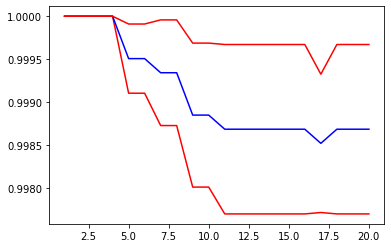

In [39]:
# Buscamos gráficamente el valor ópitmo para n_neighbors

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

In [40]:
df_scores_standar.loc[df_scores_standar.score_medio == df_scores_standar.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_superior,limite_inferior
0,1.0,0.0,1,1.0,1.0
1,1.0,0.0,2,1.0,1.0
2,1.0,0.0,3,1.0,1.0
3,1.0,0.0,4,1.0,1.0


In [41]:
best_k = df_scores_standar.loc[df_scores_standar.score_medio ==\
                               df_scores_standar.score_medio.max(),'n_neighbours'].values
best_k = best_k[1]
best_k

2

## 5 - Matriz de confusión

Ahora que decidimos cuál es el mejor preprocesamiento y el mejor valor posible para el hiperparámetro n_neighbors, podemos calcular la matriz de confusión sobre datos no utilizados en la selección del hiper parámetro.

In [42]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [43]:
# Lo utilizamos para predecir en test
#X_test = scaler.transform(X_test) # ¡Importantísimo estandarizar también los datos de test!
y_pred = model.predict(X_test)

In [44]:
# Obtenemos la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[ 851,  128],
       [   7, 1045]], dtype=int64)

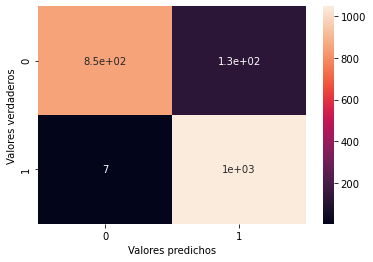

In [45]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Valores verdaderos')
plt.xlabel('Valores predichos');

In [48]:
# Podemos calcular manualmente la exactitud de nuestro modelo...

(851 + 1045) / len(y_pred)

0.9335302806499262

In [47]:
# ... o computarla utilizando el método del accuracy score

accuracy_score(y_test, y_pred)

0.9335302806499262